# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import all the dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import requests
import json
import random
from pprint import pprint
from api_keys import weather_api_key
from api_keys import g_key
from citipy import citipy

import numpy as np

## Generate Cities List

In [2]:
#generate random list for latitudes and longitudes 

latitude = []
longitude = []

for lat in np.random.uniform(-90,90,1800):
    latitude.append(lat)

for lng in np.random.uniform(-180,180,1800):
    longitude.append(lng)

In [3]:
# Zip the latitude and longtitude combination
city_location = []

city_location = zip(latitude, longitude)

In [4]:
# Find the nearest city by using citipy

cities_list = []

for location in city_location:
    
    city = citipy.nearest_city(location[0], location[1]).city_name
    
    cities_list.append(city)

In [5]:
# Create a DataFrame and remove all the duplicate cities
city_df = pd.DataFrame({"City": cities_list}).drop_duplicates(subset=['City'])

# Check the number of unique cities left in the DataFrame
len(city_df)


691

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Weather check, save base_url and the units for temperature

base_url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

# Build query_url 

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

API_cities = city_df["City"]

# The list of variables we're trying to retrieve from the API
# Create empty list to store them

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []


In [7]:
# Set up Count to print for the log

count = 1

# The beginning of the log

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through the list in cities in the city_df and perform the request for data on each of the cities

for city in API_cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        

        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        City.append(city)
        
        print(f"Processing Record {count} | {city}")
        
        count += 1
    
    except:
        
        print(f"Country information not found.")
        
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Country information not found.
Processing Record 1 | saint-philippe
Processing Record 2 | nizhniy kuranakh
Processing Record 3 | rikitea
Processing Record 4 | arraial do cabo
Processing Record 5 | bilibino
Processing Record 6 | benatky nad jizerou
Processing Record 7 | jumla
Processing Record 8 | cape town
Processing Record 9 | tiksi
Processing Record 10 | port alfred
Processing Record 11 | yellowknife
Processing Record 12 | carnarvon
Processing Record 13 | siena
Processing Record 14 | atuona
Processing Record 15 | mondovi
Processing Record 16 | rosita
Country information not found.
Processing Record 17 | kavieng
Processing Record 18 | sturgeon falls
Processing Record 19 | atasu
Processing Record 20 | castro
Processing Record 21 | vostok
Processing Record 22 | shenjiamen
Processing Record 23 | omboue
Processing Record 24 | bethel
Processing Record 25 | conde
Processing Record 26 | kaitangata
Processing Record 27 | ushuaia
Proc

Processing Record 226 | anadyr
Country information not found.
Processing Record 227 | comarapa
Processing Record 228 | dalipuga
Processing Record 229 | maniitsoq
Processing Record 230 | mitsamiouli
Processing Record 231 | constitucion
Processing Record 232 | torbay
Processing Record 233 | sorland
Processing Record 234 | hay river
Processing Record 235 | mingaora
Processing Record 236 | shache
Processing Record 237 | san quintin
Processing Record 238 | taicheng
Processing Record 239 | dalby
Country information not found.
Country information not found.
Country information not found.
Processing Record 240 | melo
Processing Record 241 | bukachacha
Processing Record 242 | correntina
Processing Record 243 | chifeng
Processing Record 244 | boa vista
Processing Record 245 | laramie
Processing Record 246 | tual
Processing Record 247 | manavalakurichi
Processing Record 248 | tautira
Processing Record 249 | sydney
Processing Record 250 | huanren
Processing Record 251 | yumen
Processing Record 252

Processing Record 456 | olinda
Processing Record 457 | ferrol
Processing Record 458 | mujiayingzi
Country information not found.
Processing Record 459 | klaksvik
Processing Record 460 | gunjur
Country information not found.
Processing Record 461 | puerto del rosario
Country information not found.
Processing Record 462 | redding
Processing Record 463 | nemuro
Processing Record 464 | naze
Processing Record 465 | yatou
Processing Record 466 | dingle
Processing Record 467 | soyo
Country information not found.
Processing Record 468 | kokstad
Processing Record 469 | macau
Country information not found.
Processing Record 470 | adana
Processing Record 471 | ladybrand
Processing Record 472 | mehamn
Processing Record 473 | urucara
Processing Record 474 | vao
Processing Record 475 | micheweni
Processing Record 476 | arkul
Processing Record 477 | karratha
Processing Record 478 | hearst
Processing Record 479 | mecca
Processing Record 480 | ibra
Country information not found.
Processing Record 481 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a DataFrame for the loop outputs (country weather information)

weather_df = pd.DataFrame ({
    "City":City,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "Date":Date})

In [9]:
# Export the DataFrame to a csv.

weather_df.to_csv('weather_df.csv')


In [10]:
# Preview DataFrame
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,84.20,65,0,24.16,RE,1616052868
1,nizhniy kuranakh,58.8353,125.4869,23.68,80,100,5.70,RU,1616052868
2,rikitea,-23.1203,-134.9692,75.24,86,100,16.08,PF,1616052869
3,arraial do cabo,-22.9661,-42.0278,75.49,89,70,17.85,BR,1616052870
4,bilibino,68.0546,166.4372,-16.40,90,0,3.02,RU,1616052389


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_outlier = weather_df.loc[weather_df["Humidity"] > 100]
humidity_outlier

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_clean = weather_df.drop(weather_df[weather_df["Humidity"] >100].index, inplace = False)
weather_clean.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,84.20,65,0,24.16,RE,1616052868
1,nizhniy kuranakh,58.8353,125.4869,23.68,80,100,5.70,RU,1616052868
2,rikitea,-23.1203,-134.9692,75.24,86,100,16.08,PF,1616052869
3,arraial do cabo,-22.9661,-42.0278,75.49,89,70,17.85,BR,1616052870
4,bilibino,68.0546,166.4372,-16.40,90,0,3.02,RU,1616052389


In [13]:
# Check the number of rows in the clean datafram

print(len(weather_clean))

630


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

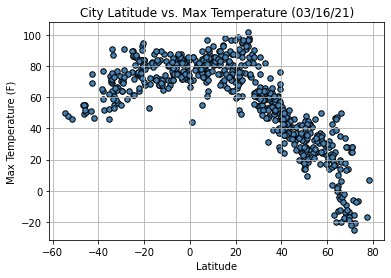

In [14]:
# Plot City Latitude vs. Max Temperature

x_axis = weather_clean["Lat"]
y_axis = weather_clean["Max Temp"]

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "steelblue", edgecolors = "black", s = 30)

plt.title("City Latitude vs. Max Temperature (03/16/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("Latitude vs. Temperature Plot.png")

plt.show()

#### The above plot is showing the relationship between city latitude and their max temperature.
#### From the plot we can see a trend that when the latitude move towards 0 the max temperature increases, and when the latitude moves away from 0 the max temperature start to decrease again.


## Latitude vs. Humidity Plot

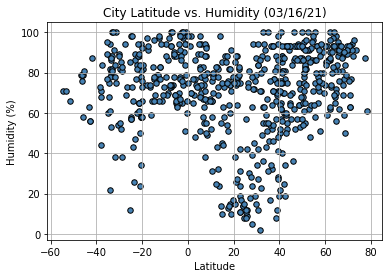

In [15]:
x_axis = weather_clean["Lat"]
y_axis = weather_clean["Humidity"]

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "steelblue", edgecolors = "black", s = 30)

plt.title("City Latitude vs. Humidity (03/16/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("Latitude vs. Humidity Plot.png")

plt.show()

#### The plot is trying to identify the relationship between city latitude and city humidity, trying to discover the impact of latitude on the humidity.

## Latitude vs. Cloudiness Plot

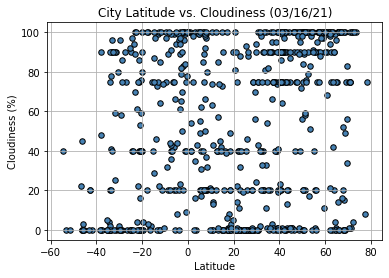

In [16]:
x_axis = weather_clean["Lat"]
y_axis = weather_clean["Cloudiness"]

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "steelblue", edgecolors = "black", s = 30)

plt.title("City Latitude vs. Cloudiness (03/16/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("Latitude vs. Cloudiness Plot.png")

plt.show()

#### The above plot is trying to discover the relationship between city latitude and their cloud coverage.

## Latitude vs. Wind Speed Plot

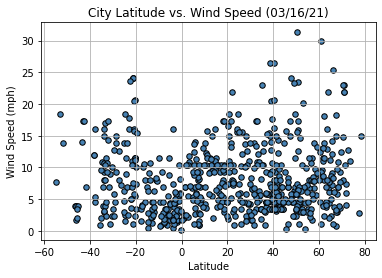

In [17]:
x_axis = weather_clean["Lat"]
y_axis = weather_clean["Wind Speed"]

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "steelblue", edgecolors = "black", s = 30)

plt.title("City Latitude vs. Wind Speed (03/16/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Latitude vs. Wind Speed Plot.png")

plt.show()

#### The last plot is plotting the relationship between latitude and wind speed, trying to identify if the wind speed is different when the city is located in different latitude location.

## Linear Regression

In [18]:
# Create new DataFrame for Northern & Souther Hemisphere
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and
# Southern Hemisphere (less than 0 degrees latitude):

northern = weather_clean.loc[weather_clean["Lat"] >= 0]

southern = weather_clean.loc[weather_clean["Lat"] < 0]


In [19]:
northern.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,nizhniy kuranakh,58.8353,125.4869,23.68,80,100,5.70,RU,1616052868
4,bilibino,68.0546,166.4372,-16.40,90,0,3.02,RU,1616052389
5,benatky nad jizerou,50.2909,14.8234,34.00,86,75,5.75,CZ,1616052871
6,jumla,29.2747,82.1838,64.09,19,56,11.10,NP,1616052872
8,tiksi,71.6872,128.8694,-25.20,94,100,5.91,RU,1616052873


In [20]:
print(len(northern))

440


In [21]:
southern.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,84.20,65,0,24.16,RE,1616052868
2,rikitea,-23.1203,-134.9692,75.24,86,100,16.08,PF,1616052869
3,arraial do cabo,-22.9661,-42.0278,75.49,89,70,17.85,BR,1616052870
7,cape town,-33.9258,18.4232,69.01,82,20,14.97,ZA,1616052613
9,port alfred,-33.5906,26.8910,75.15,80,78,16.96,ZA,1616052874


In [22]:
print(len(southern))

190


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

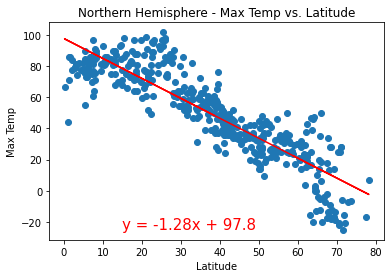

The r-squared is: 0.7805649221434592


In [23]:

x_values = northern["Lat"]
y_values = northern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-25),fontsize=15,color="red")

plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Northern Hemisphere - Max Temp vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### From the scatter plot and the linear regression, we could conclude in the Northern hemisphere there is a strong negative correlation between latitude and max temperature. When the latitude increases, the max temperature decreases or in other words the weather become colder.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

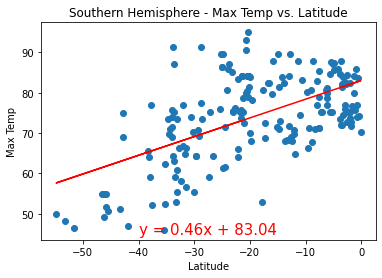

The r-squared is: 0.328794818778171


In [24]:

x_values = southern["Lat"]
y_values = southern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### Opposite to the result we saw in the Northern hemisphere, in Southern hemisphere there is a weak positive correlation relationship between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

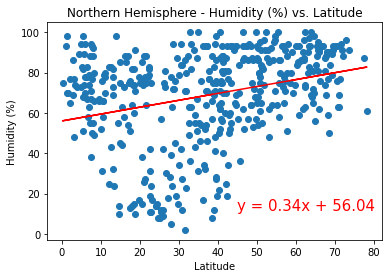

The r-squared is: 0.0824293328350989


In [25]:

x_values = northern["Lat"]
y_values = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,12),fontsize=15,color="red")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### When looking at the linear regression between Latitude and humidity level in the Northern hemisphere, there is no correlation relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

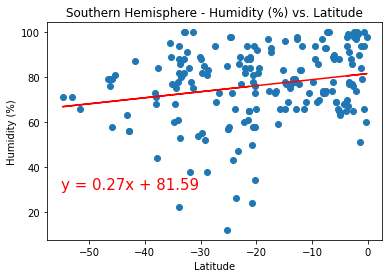

The r-squared is: 0.047205966060069396


In [26]:

x_values = southern["Lat"]
y_values = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### In the Southern hemisphere, there is no correlation relationship between latitude and humidity level.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

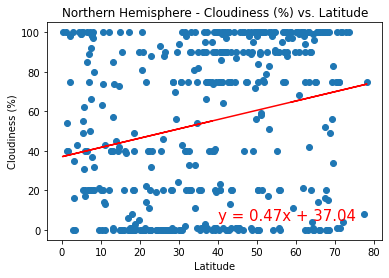

The r-squared is: 0.05465032763480682


In [27]:

x_values = northern["Lat"]
y_values = northern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### In the Northern hemisphere, there is no correlation relationship between the cloud coverage and latitude. From the plot we could see the cloudiness are spreaded out across all different latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

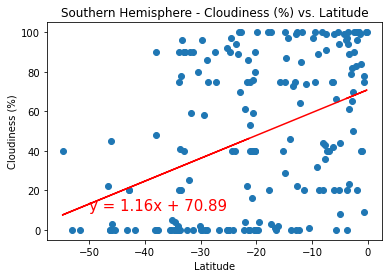

The r-squared is: 0.1590955770259734


In [28]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### Again, if we look at the relationship between cloud coverage and latitude in the Southern hemisphere, there is also no correlation relationship between the two variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

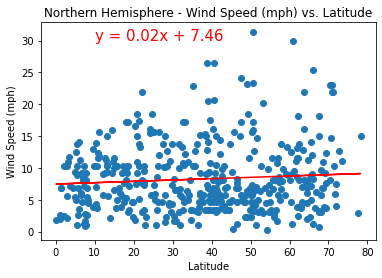

The r-squared is: 0.006187055504951213


In [29]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### Lastly, we want to look at the relationship between latitude & wind speed in the cities in the Northern hemisphere. The plot and the r value is stating that there is no correlation relationship between them.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

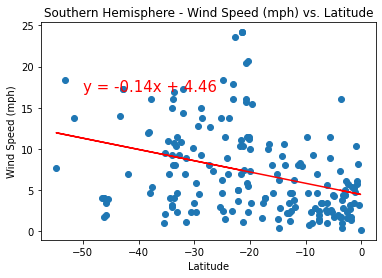

The r-squared is: 0.1138629688844856


In [30]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

print(f"The r-squared is: {rvalue**2}")

#### If we look at the citieis in the Southern hemisphere, eventho there is a slightly higher r value. There is still no correlation relationship between the wind speed & latitude.

## Observations

#### 1. By looking at the linear regression results between latitude and other variables including max temperature, cloud coverage, humidity and wind speed. We only discovered one correlation relationship between the latitude and max temperature.

#### 2. However, if we look further into the correlation relationship between latitude and max temperature. When we split the latitudes into Northern and Southern hemisphere. We could identify there is a negative correlation between latitude & max temperature in the Northern hemisphere; the relationship is oppositve in the Southern hemisphere (positive correlation). 

#### 3. One limitation in the data, eventho we randomly selected 500+ cities, the distribution of cities in the Northern and Southern hemisphere are not even. We have more cities located in the Northern hemisphere, this might be the reason why we are seeing a strong correlation relationship between latitiude and max temperature in the Northern hemisphere but only a weak correlation relationship in the Southern hemisphere. For further analysis, we could increase the number of cities located in the Southern hemisphere to further discover the correlation relationship in Southern hemisphere.